In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

# Extra modules - to extend the project (beyond scope of challenge requirements)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/lending_data.csv")
df_lending_original = pd.read_csv(file_path)

# Review the DataFrame
df_lending_original.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Check data types and non-null counts
df_lending_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Get summary statistics for the numerical columns
df_lending_original.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [5]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Check for missing values
df_lending_original.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

In [6]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Check the number of unique values
df_lending_original.nunique()

loan_size            182
interest_rate       4692
borrower_income      662
debt_to_income       662
num_of_accounts       17
derogatory_marks       4
total_debt           662
loan_status            2
dtype: int64

In [7]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Define the distribution of the loan_status column
df_lending_original['loan_status'].value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

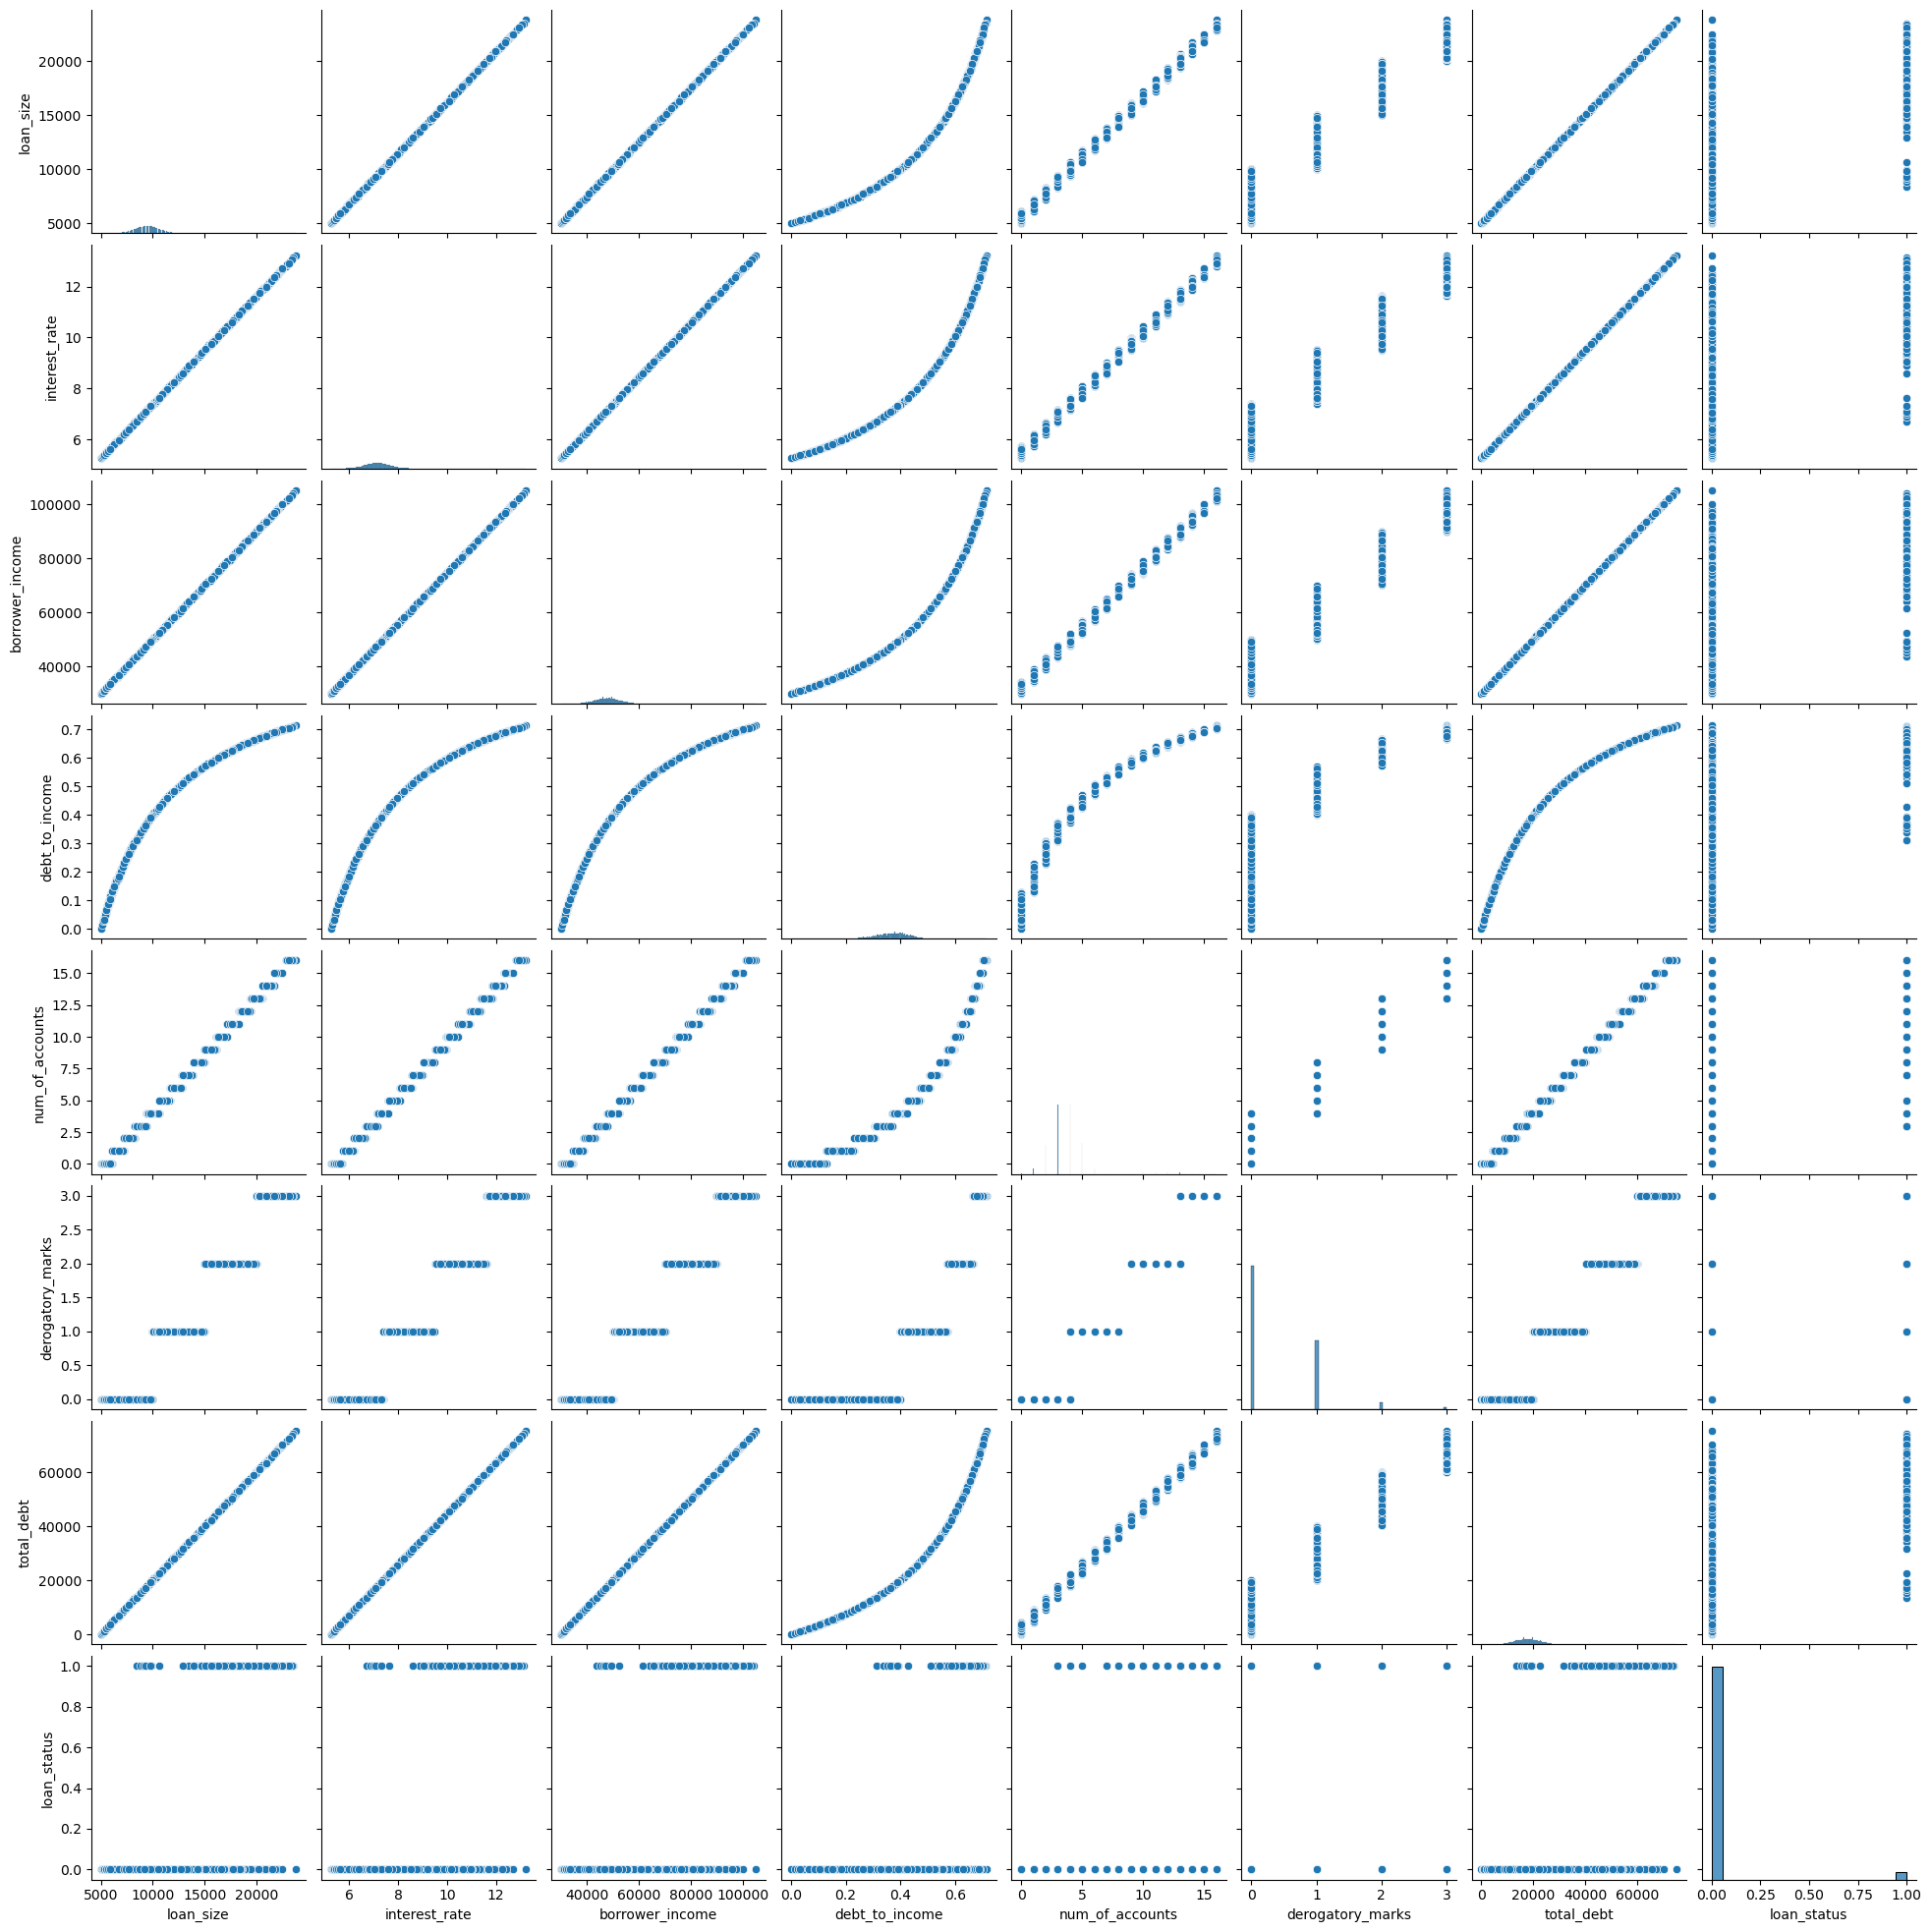

In [8]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Create pairplot
sns.pairplot(df_lending_original)

# Show the plot
plt.show()

### Data Scaling - Standardisation (additional code not required for this task)

In [9]:
# Separate the features (X) and target variable (y)
X = df_lending_original.drop('loan_status', axis=1)
y = df_lending_original['loan_status']

In [10]:
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [12]:
# Initiate and fit `StandardScaler`
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the output array of the scaled features
print(X_scaled)


[[ 0.42730427  0.4268375   0.42740435 ...  0.61614258  1.04399575
   0.42740435]
 [-0.67148676 -0.67491817 -0.67155173 ... -0.43404935 -0.67397306
  -0.67155173]
 [-0.38484562 -0.370249   -0.37292236 ... -0.43404935 -0.67397306
  -0.37292236]
 ...
 [ 3.72367737  3.71299241  3.71232744 ...  3.76671836  2.76196455
   3.71232744]
 [ 3.10262157  3.12051768  3.1150687  ...  3.24162239  2.76196455
   3.1150687 ]
 [ 2.76820691  2.75401528  2.75671345 ...  2.71652643  2.76196455
   2.75671345]]


In [13]:
# Create a scaled DataFrame from the scaled features
df_lending_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_lending_scaled['loan_status'] = y.values

# Verify the scaled DataFrame
df_lending_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404,0
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552,0
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922,0
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459,0
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295,0


c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

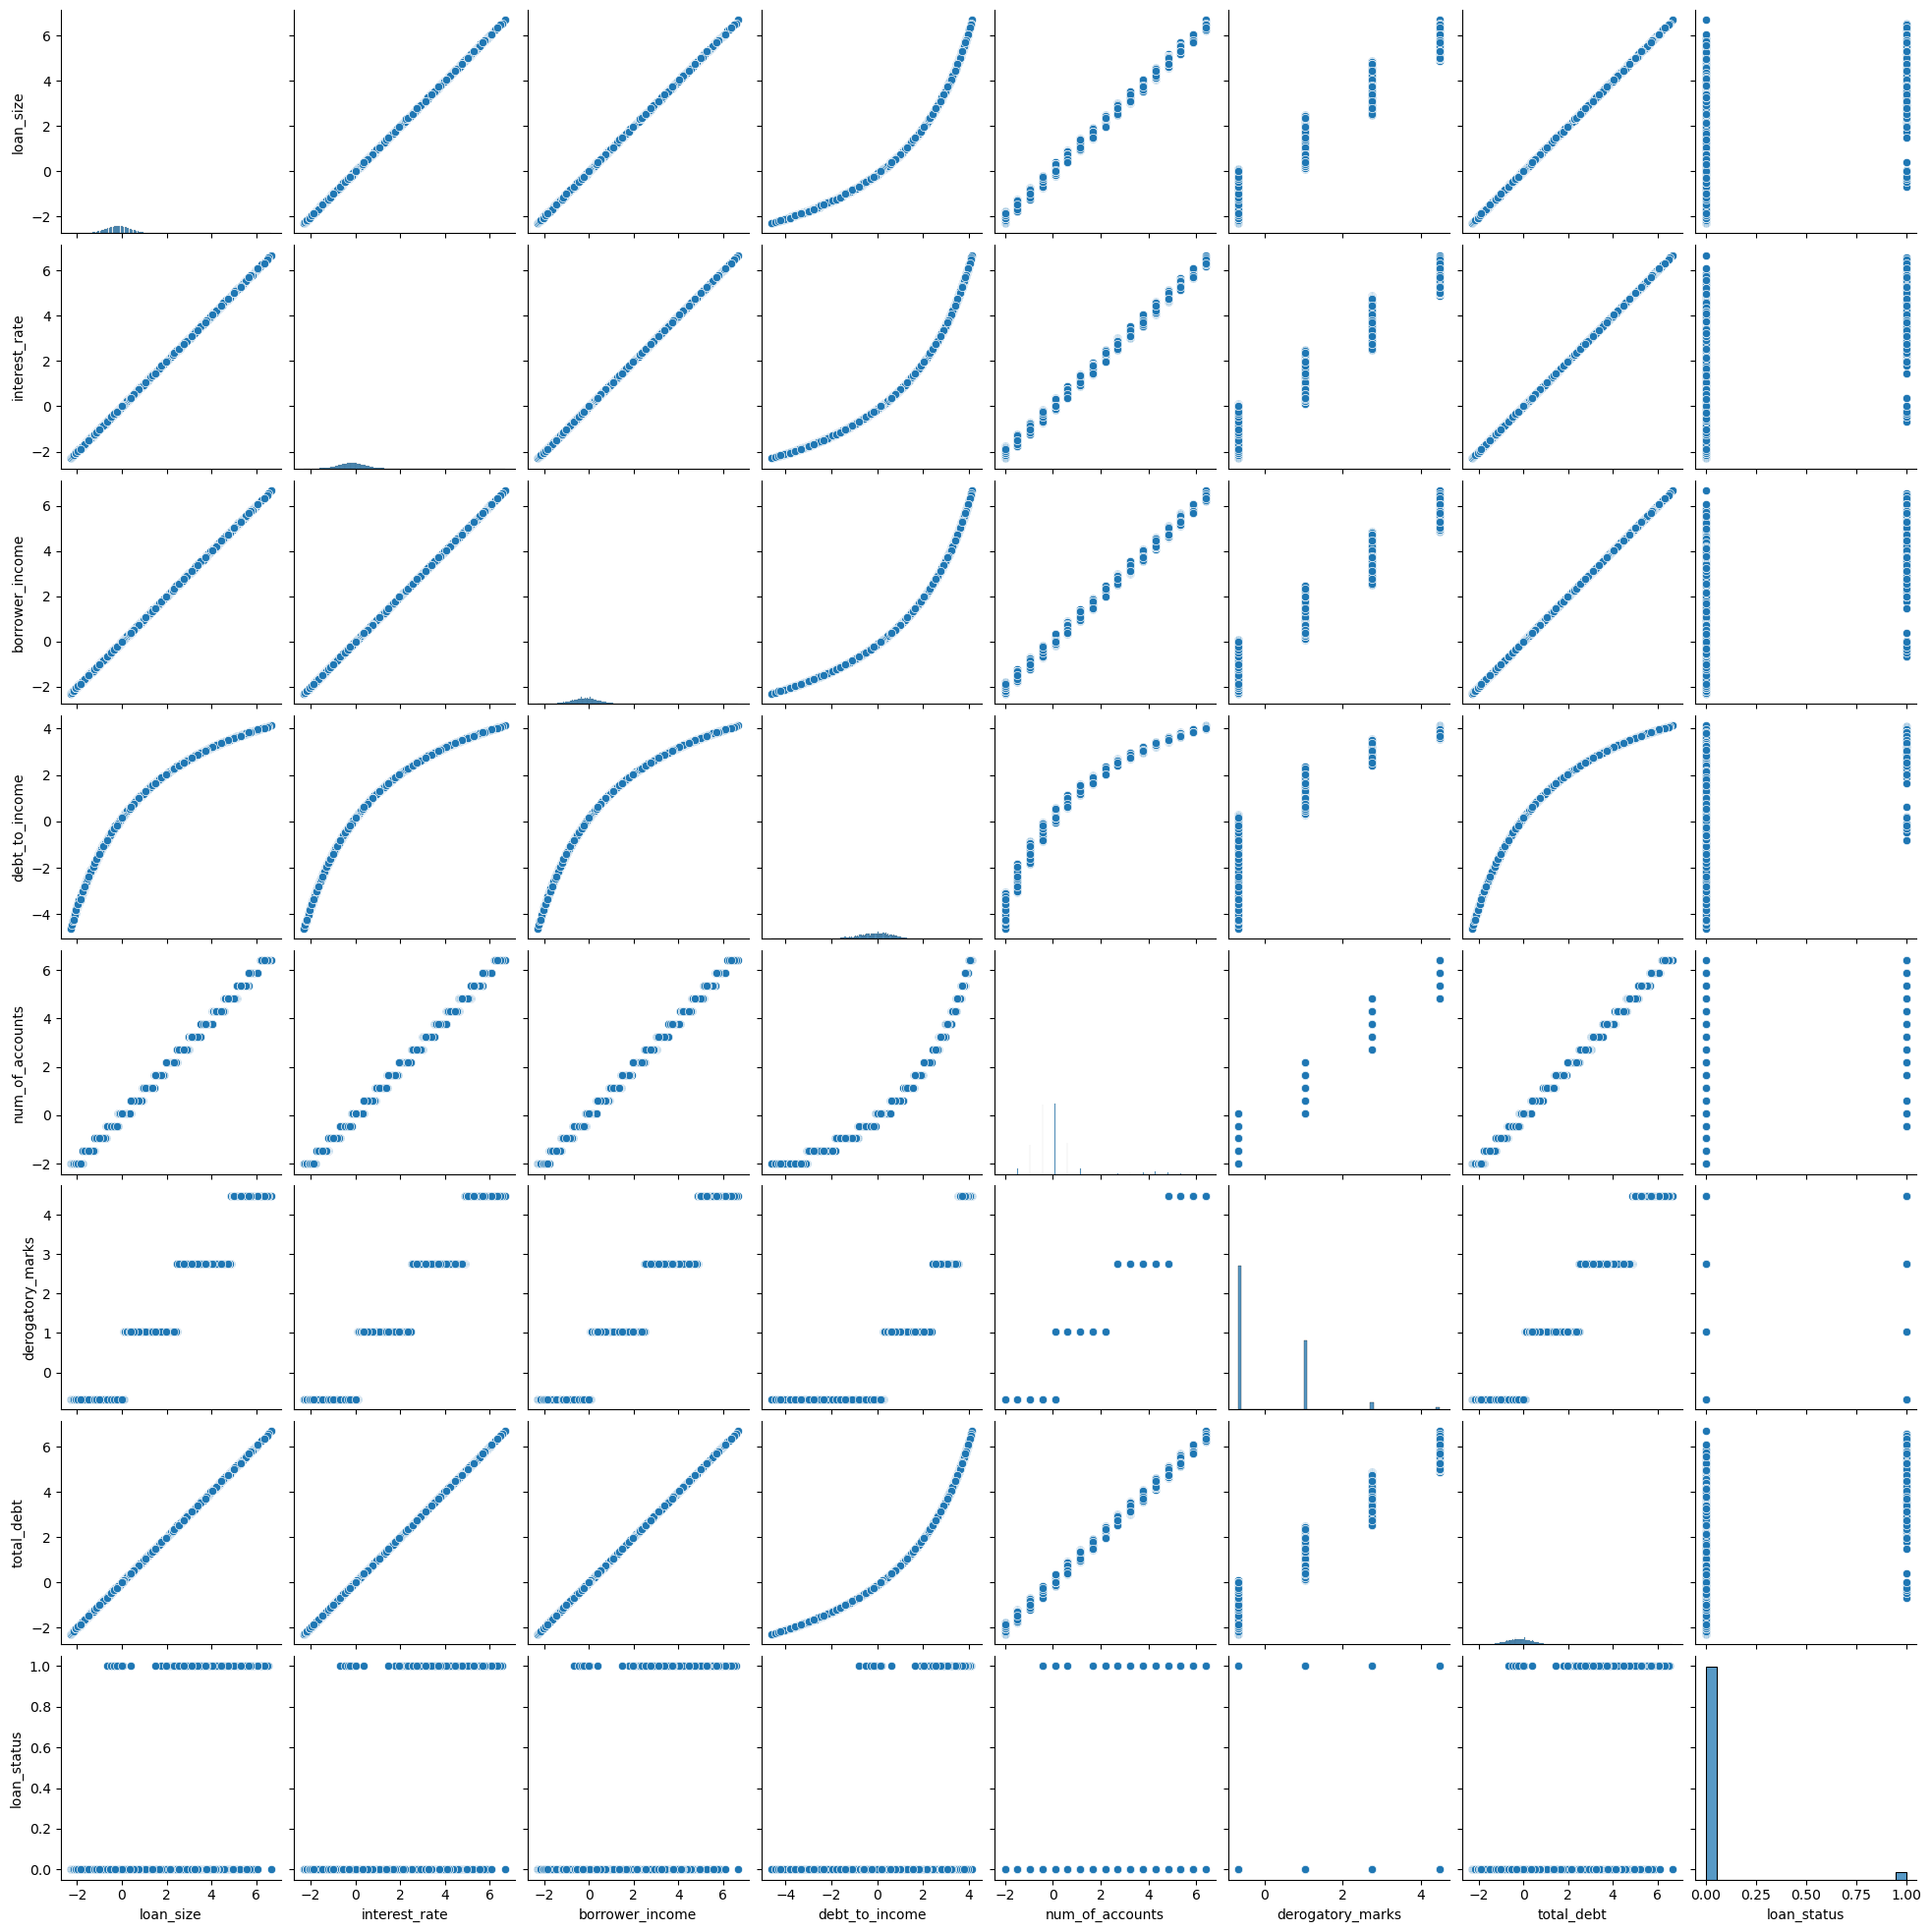

In [14]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Create pairplot
sns.pairplot(df_lending_scaled)

# Show the plot
plt.show()

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [15]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending_scaled['loan_status']

# Separate the X variable, the features
X = df_lending_scaled.drop(columns='loan_status')

In [16]:
# Review the y variable Series
print("Labels:\n", y.head())

Labels:
 0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


In [17]:
# Review the X variable DataFrame
print("Features:\n", X.head())

Features:
    loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0   0.427304       0.426837         0.427404        0.668571         0.616143   
1  -0.671487      -0.674918        -0.671552       -0.802166        -0.434049   
2  -0.384846      -0.370249        -0.372922       -0.344424        -0.434049   
3   0.427304       0.417844         0.415459        0.655346         0.616143   
4   0.475078       0.456068         0.451295        0.694873         0.616143   

   derogatory_marks  total_debt  
0          1.043996    0.427404  
1         -0.673973   -0.671552  
2         -0.673973   -0.372922  
3          1.043996    0.415459  
4          1.043996    0.451295  


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Verify the shapes of the training and testing datasets
print(f'==========================\nX_train shape: {X_train.shape}')
print(f'==========================\nX_test shape: {X_test.shape}')
print(f'==========================\ny_train shape: {y_train.shape}')
print(f'==========================\ny_test shape: {y_test.shape}')

X_train shape: (62028, 7)
X_test shape: (15508, 7)
y_train shape: (62028,)
y_test shape: (15508,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [19]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [20]:
# Additional code - to extend the project (beyond scope of challenge requirements)
# Viewing the outputs of the model

# View model coefficients
coefficients = logistic_regression_model.coef_
print("===================\nModel Coefficients:\n", coefficients)

# View model intercept
intercept = logistic_regression_model.intercept_
print("===================\nModel Intercept:\n", intercept)

# Make predictions on the training data
train_predictions = logistic_regression_model.predict(X_train)

# View the first 10 predictions
print("===================\nFirst 10 Predictions on Training Data:\n", train_predictions[:10])

# Calculate and print the accuracy on the training data
training_accuracy = logistic_regression_model.score(X_train, y_train)
print("===================\nTraining Accuracy:\n", training_accuracy)


Model Coefficients:
 [[-0.35186868 -1.01996639 -1.04813368  8.69508123 -0.10878159  0.23557353
  -1.04813368]]
Model Intercept:
 [-12.26636986]
First 10 Predictions on Training Data:
 [0 0 0 0 1 0 0 0 0 0]
Training Accuracy:
 0.9941478042174502


### Additional Comments

**Explanation of model fit and accuracy:**

1. **Model Coefficients**

The coefficients are the weights assigned to each feature in the model. They indicate how much each feature contributes to predicting the target variable (loan_status). Here are the coefficients for each feature:

- loan_size: `-0.352`
- interest_rate: `-1.020`
- borrower_income: `-1.048`
- debt_to_income: `8.695`
- num_of_accounts: `-0.109`
- derogatory_marks: `0.236`
- total_debt: `-1.048`

**Interpretation:**

- A negative coefficient means that as the feature value increases, the likelihood of the loan being high-risk (1) decreases.
- A positive coefficient means that as the feature value increases, the likelihood of the loan being high-risk (1) increases.

E.g., debt_to_income has a large positive coefficient (8.695), indicating it has a strong influence on predicting high-risk loans.

2. **Model Intercept**

The intercept is a constant added to the logistic regression equation. In this case, the intercept is `-12.27`.

**Interpretation:**

- The intercept adjusts the base level of the prediction. It's the starting point before considering the influence of the feature coefficients.

3. **First 10 Predictions on Training Data**
These are the first 10 predictions made by the model on the training data. They are either 0 (healthy loan) or 1 (high-risk loan).

**Interpretation:**

The model predicts the first 10 loans in the training set as follows: 0, 0, 0, 0, 1, 0, 0, 0, 0, 0. This means that it predicts 9 healthy loans and 1 high-risk loan among the first 10 samples.

4. **Training Accuracy**

The training accuracy is the proportion of correct predictions made by the model on the training data. In this case, the training accuracy is `0.9941`, or `99.41%`.

**Interpretation:**

The model correctly predicts the loan status (healthy or high-risk) `99.41%` of the time on the training data. This high accuracy indicates that the model has fit the training data well.

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [21]:

# Make predictions on the testing data
test_predictions = logistic_regression_model.predict(X_test)

# Display the first 10 predictions
print("=============================\nFirst 10 Predictions on Testing Data:\n", test_predictions[:10])




First 10 Predictions on Testing Data:
 [0 0 0 0 0 0 0 0 0 0]


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [22]:
# Evaluate the model performance
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("=============================\nConfusion Matrix:\n", conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, test_predictions)
print("=============================\nClassification Report:\n", class_report)

Confusion Matrix:
 [[14918    83]
 [    9   498]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.86      0.98      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       0.99      0.99      0.99     15508



---
### Additional Comments

**Predictions**
The first 10 predictions on the testing data are all 0, which means the model predicts these 10 loans as healthy.

**Confusion Matrix**
The confusion matrix shows the performance of the model:
- **True Negatives (14918):** The model correctly predicted 14918 healthy loans.
- **False Positives (83):** The model incorrectly predicted 83 high-risk loans as healthy.
- **False Negatives (9):** The model incorrectly predicted 9 healthy loans as high-risk.
- **True Positives (498):** The model correctly predicted 498 high-risk loans.

**Classification Report**
- **Precision:** The percentage of correct positive predictions. For healthy loans (0), it's 1.00 (100%), and for high-risk loans (1), it's 0.86 (86%).
- **Recall:** The percentage of actual positives correctly predicted. For healthy loans, it's 0.99 (99%), and for high-risk loans, it's 0.98 (98%).
- **F1-Score:** The harmonic mean of precision and recall. For healthy loans, it's 1.00 (100%), and for high-risk loans, it's 0.92 (92%).
- **Support:** The number of actual occurrences of each class in the test set.

**Accuracy**
The overall accuracy of the model is 0.99 (99%), meaning it correctly predicts the loan status 99% of the time on the testing data.

**Summary**
The model performs very well, especially for predicting healthy loans. It also does a good job with high-risk loans but is slightly less precise in predicting them compared to healthy loans.

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer**

The logistic regression model predicts both `0` (healthy loan) and `1` (high-risk loan) labels with high accuracy. Here are the detailed performance metrics:

- **Healthy Loans (0):**
  - **Precision:** 1.00 (100%)
  - **Recall:** 0.99 (99%)
  - **F1-Score:** 1.00 (100%)
  - The model is highly accurate in predicting healthy loans, with almost perfect precision and recall.

- **High-Risk Loans (1):**
  - **Precision:** 0.86 (86%)
  - **Recall:** 0.98 (98%)
  - **F1-Score:** 0.92 (92%)
  - The model also performs well in predicting high-risk loans, with a high recall indicating that it correctly identifies 98% of actual high-risk loans. The precision is slightly lower at 86%, meaning that some of the predicted high-risk loans are actually healthy loans.

Overall, the model shows a strong ability to predict healthy loans with near-perfect precision and recall. It also performs well in predicting high-risk loans, though with a slightly lower precision. The overall accuracy of the model is 99%, indicating that it makes correct predictions for the vast majority of the loans.

## Additional Code - for visualising the model performance

In [23]:
# Print the confusion matrix values
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[14918    83]
 [    9   498]]


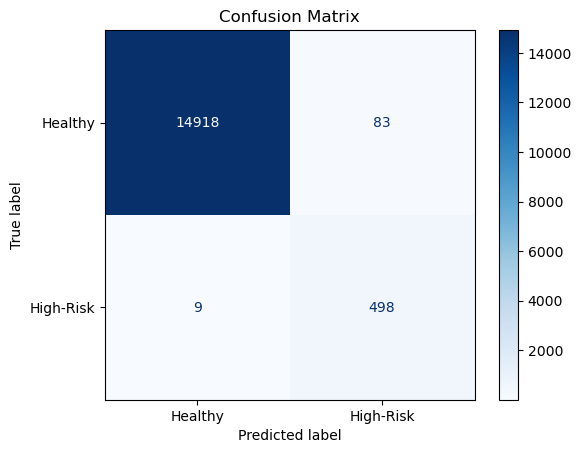

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Healthy', 'High-Risk'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

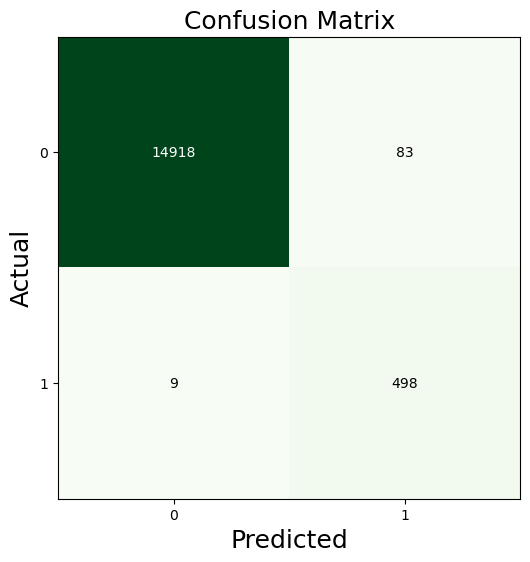

In [25]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix using mlxtend
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

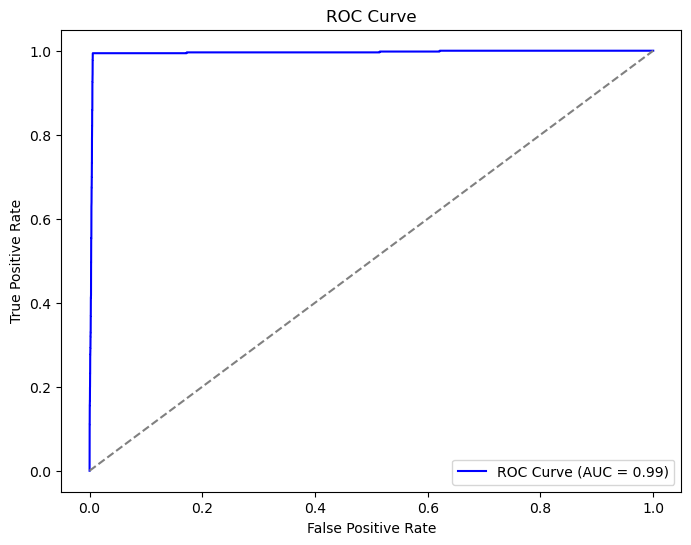

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability predictions
y_test_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

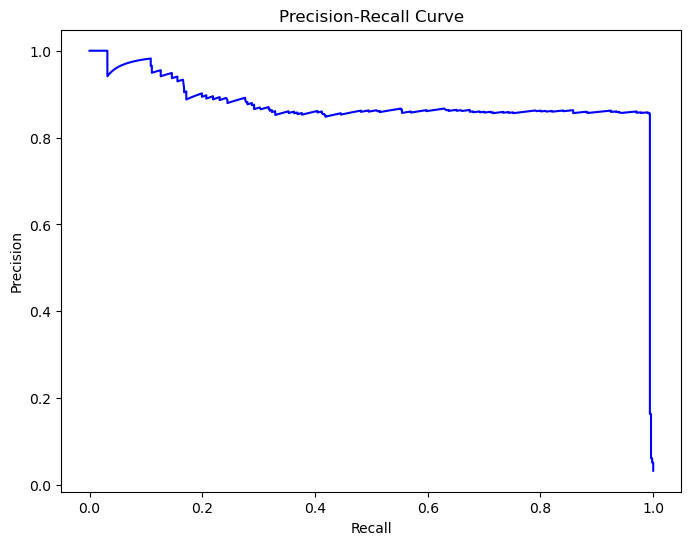

In [28]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


---